In [13]:
#We need to register MJD of each excel file we ingest
#Each injest needs to be indentifiable with the MJD.

#Test single plots only.

import matplotlib.pyplot as plt
import glob
import astropy
import importlib
import math
import numpy as np
import xlwt
import xlsxwriter
import warnings
warnings.filterwarnings('ignore')

from xlwt import Workbook
from reduct_funcs import funcs_calib_and_plot
from reduct_funcs import funcs_star_finder
from reduct_funcs import funcs_apt_phot
from reduct_funcs import funcs_utils
from reduct_funcs import funcs_polarimetry

importlib.reload(funcs_calib_and_plot)
importlib.reload(funcs_star_finder)
importlib.reload(funcs_apt_phot)
importlib.reload(funcs_utils)
importlib.reload(funcs_polarimetry)

#This notebook plots the polarization data that we worked so hard to get.

<module 'reduct_funcs.funcs_polarimetry' from 'C:\\Users\\afiq-Astro\\Desktop\\TSSP\\reductions_4\\reduct_funcs\\funcs_polarimetry.py'>

In [28]:
#Defend pop punk! yeah
#initiate utils to merge two scpripts
#So there is an imbalance between the excels
#But the plan is just to combine them line by fugging line
#starting with the 0+1 line (where the data are)

#This little part right here combines scripts. I somewhat don't trust the output. It is prone to name
#convention errors

#Params
MJD = '2020-04-28'
targ_f_name = 'oj287'
p1_strt = 215
p1_end = 229

p3_strt = 229
p3_end = 243

pol_filt = 'R'

p1_filename=MJD+'_'+targ_f_name+'_P1-'+pol_filt+str(p1_strt)+'-'+str(p1_end)+'.xlsx'
p3_filename=MJD+'_'+targ_f_name+'_P3-'+pol_filt+str(p3_strt)+'-'+str(p3_end)+'.xlsx'

p1R_script = './stats/'+MJD+'/pol_std/OJ287/' + p1_filename
p3R_script = './stats/'+MJD+'/pol_std/OJ287/' + p3_filename
sv_out = './stats/'+MJD+'/pol_std/OJ287/'

funcs_utils.combine_excels(p1R_script,  p3R_script, sv_out, MJD, targ_f_name, "R", p1_strt, p3_end)

Sheet 1: ./stats/2020-04-28/pol_std/OJ287/2020-04-28_oj287_P1-R215-229.xlsx
Sheet 2: ./stats/2020-04-28/pol_std/OJ287/2020-04-28_oj287_P3-R229-243.xlsx
output: ./stats/2020-04-28/pol_std/OJ287/master_2020-04-28_oj287_P1-P3R215-243_mac_comb.xlsx


In [3]:
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")

Load all excel data
23 targets
19 zero pols
37 high pols


In [21]:
#2022-01-26
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")

Load all excel data
22 targets
16 zero pols
36 high pols


In [30]:
(target_data, zero_pol_data, high_pol_data)= funcs_utils.data_loader()

print(len(target_data) , "targets")
print(len(zero_pol_data) , "zero pols")
print(len(high_pol_data) , "high pols")

Load all excel data
20 targets
16 zero pols
30 high pols


In [5]:
master_list = target_data+zero_pol_data+high_pol_data
print(len(master_list))

79


In [37]:
data_strs = ['cep', 'Cep']
target_filtered_data = funcs_utils.filter_data(target_data, data_strs)

data_strs = ['64106']
high_pol_filtered_data = funcs_utils.filter_data(high_pol_data, data_strs)

Returned 22 results
Returned 4 results


In [ ]:
#do not combine! Write this script but do not combine!


#funcs_polarimetry.calib_data(filtered_data, (-0.002, 0.001 ,-0.001 , 0.001), False)

Plot Position Angle stability
bd64106 2020-04-16
Pol PA!!! 57.71053116550423 ± 57.71053116550423
bd64106 2020-04-22
Pol PA!!! 57.80311030303798 ± 57.80311030303798
bd64106 2020-04-23
Pol PA!!! 58.19205552730066 ± 58.19205552730066
bd64106 2020-04-28
Pol PA!!! 58.28069978569923 ± 58.28069978569923


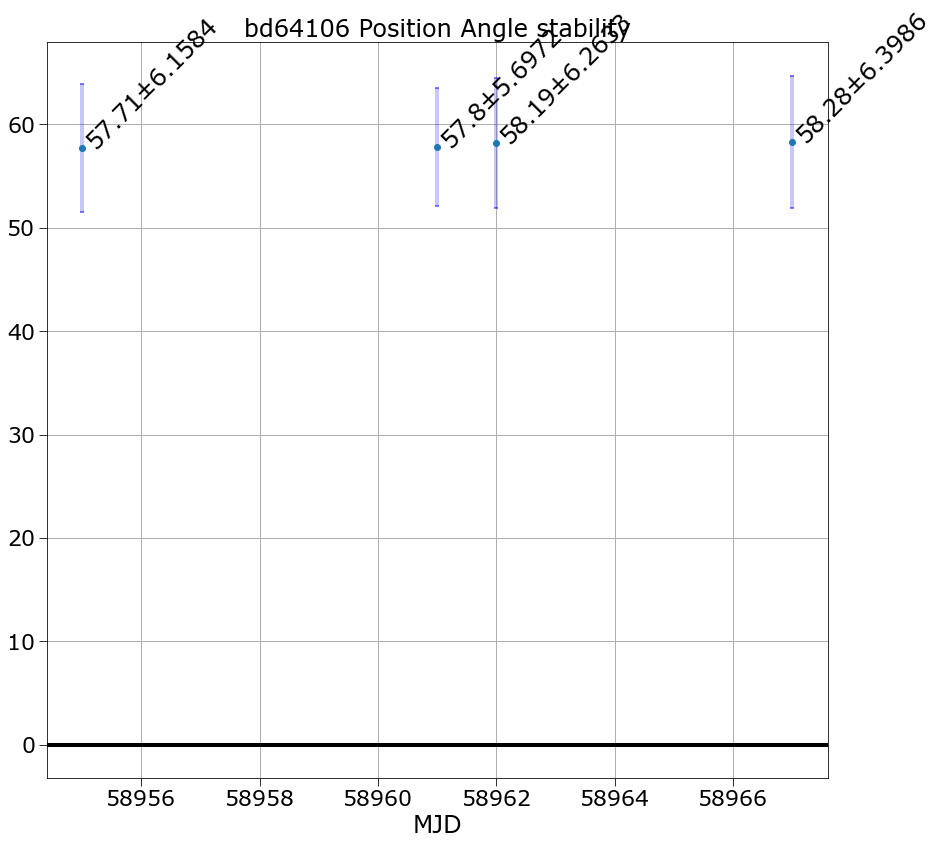

Plot Polarization Degree stability
bd64106 2020-04-16
Pol D!!! 5.377425278638882 ± 1.1535174206969372
bd64106 2020-04-22
Pol D!!! 5.427455057516363 ± 1.0769355604320618
bd64106 2020-04-23
Pol D!!! 5.426067999065983 ± 1.1909550118665244
bd64106 2020-04-28
Pol D!!! 5.365483774686726 ± 1.2004414483874022


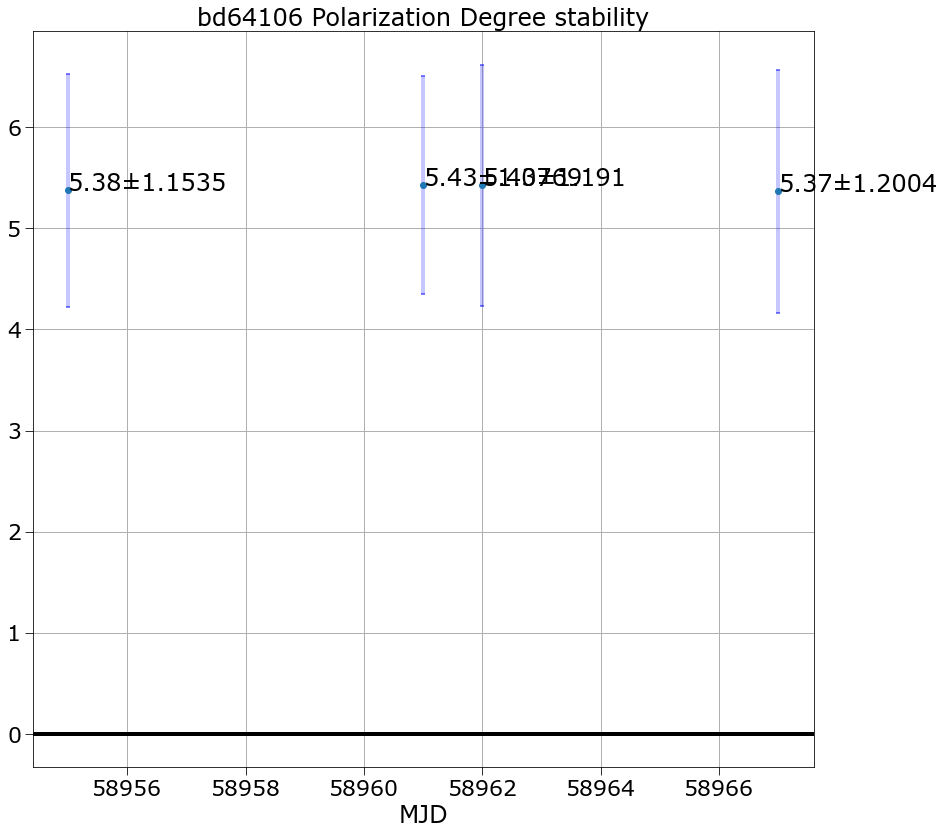

In [38]:
funcs_polarimetry.plot_PA_stability(high_pol_filtered_data , 'degree', True,False, True,'./img_out/stability/EE Cephei_PD_stab')
funcs_polarimetry.plot_PD_stability(high_pol_filtered_data , 'perc', True,False, True,'./img_out/stability/EE Cephei_PD_stab')

In [ ]:
#you will have an artefact called "calibrated data" and you will feed these to the same plot tools

In [75]:
funcs_polarimetry.plot_PA_stability(filtered_data , 'degree', True,False, True,'./img_out/stability/EE Cephei_PD_stab')
funcs_polarimetry.plot_PD_stability(filtered_data , 'perc', True,False, True,'./img_out/stability/EE Cephei_PD_stab')

Returned 16 results


In [39]:
data_strs = ['EE', 'ee']
filtered_data = funcs_utils.filter_data(target_data, data_strs)

Returned 20 results


Plot Polarization Degree stability
bd64106 2020-04-16
Pol D!!! 5.377425278638882 ± 1.1535174206969372
bd64106 2020-04-22
Pol D!!! 5.427455057516363 ± 1.0769355604320618
bd64106 2020-04-23
Pol D!!! 5.426067999065983 ± 1.1909550118665244
bd64106 2020-04-28
Pol D!!! 5.365483774686726 ± 1.2004414483874022


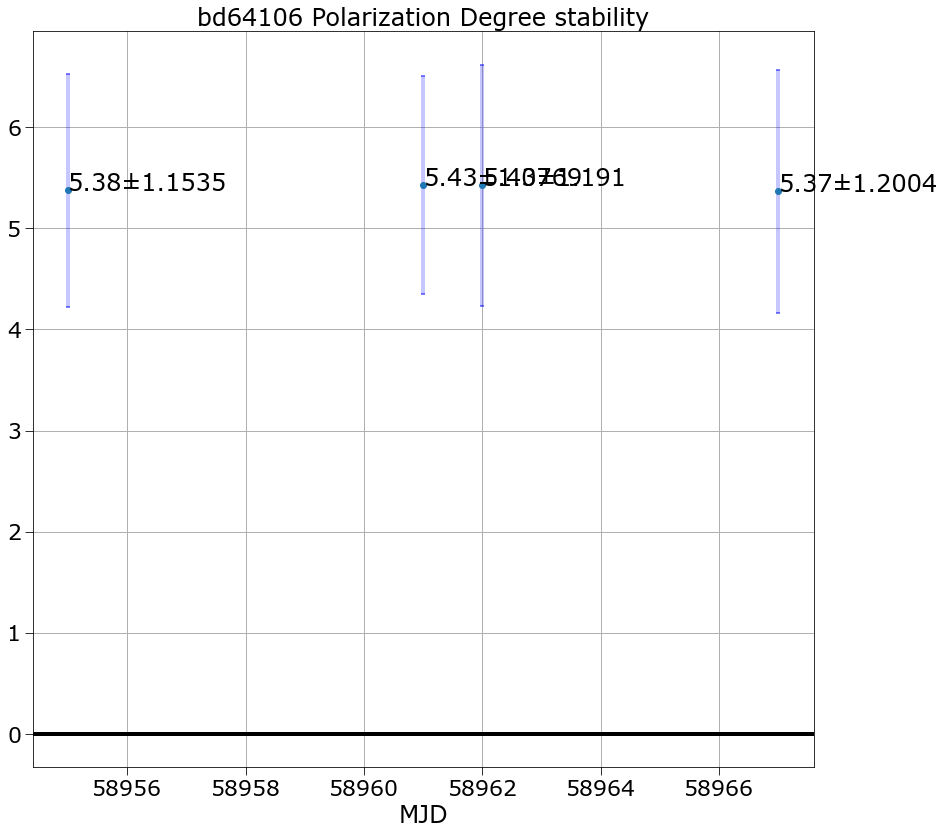

In [39]:
funcs_polarimetry.plot_PD_stability(high_pol_filtered_data, 'perc', True,False, True,'./img_out/stability/EE Cephei_PD_stab')

N obs: 20


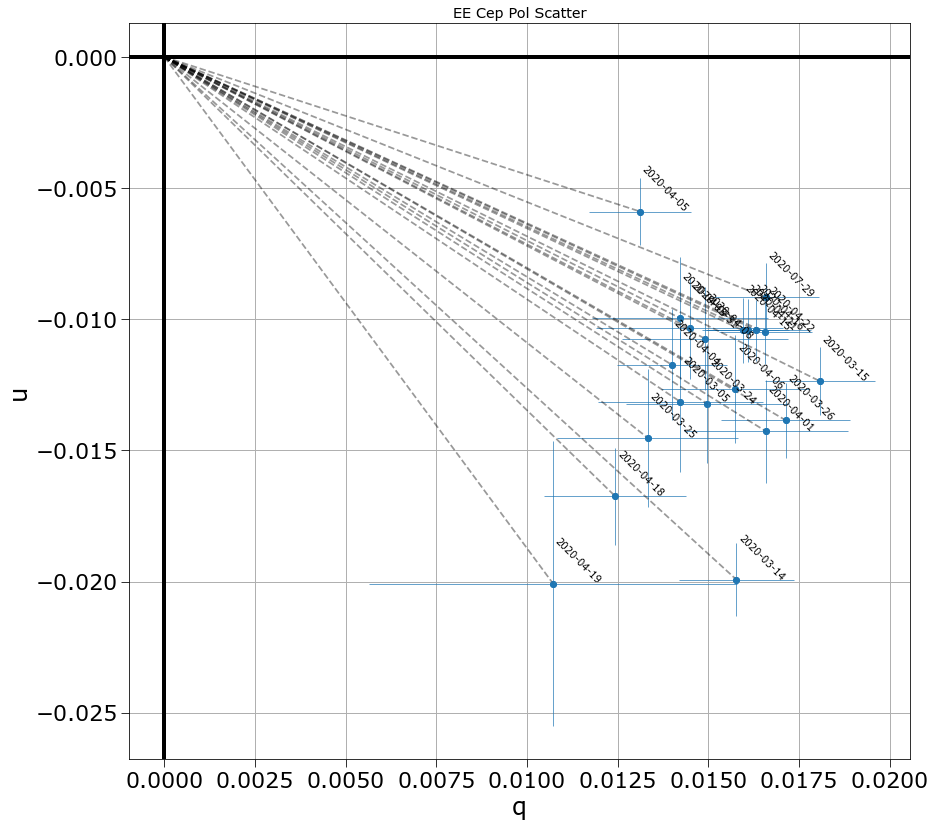

Plot q or u stability


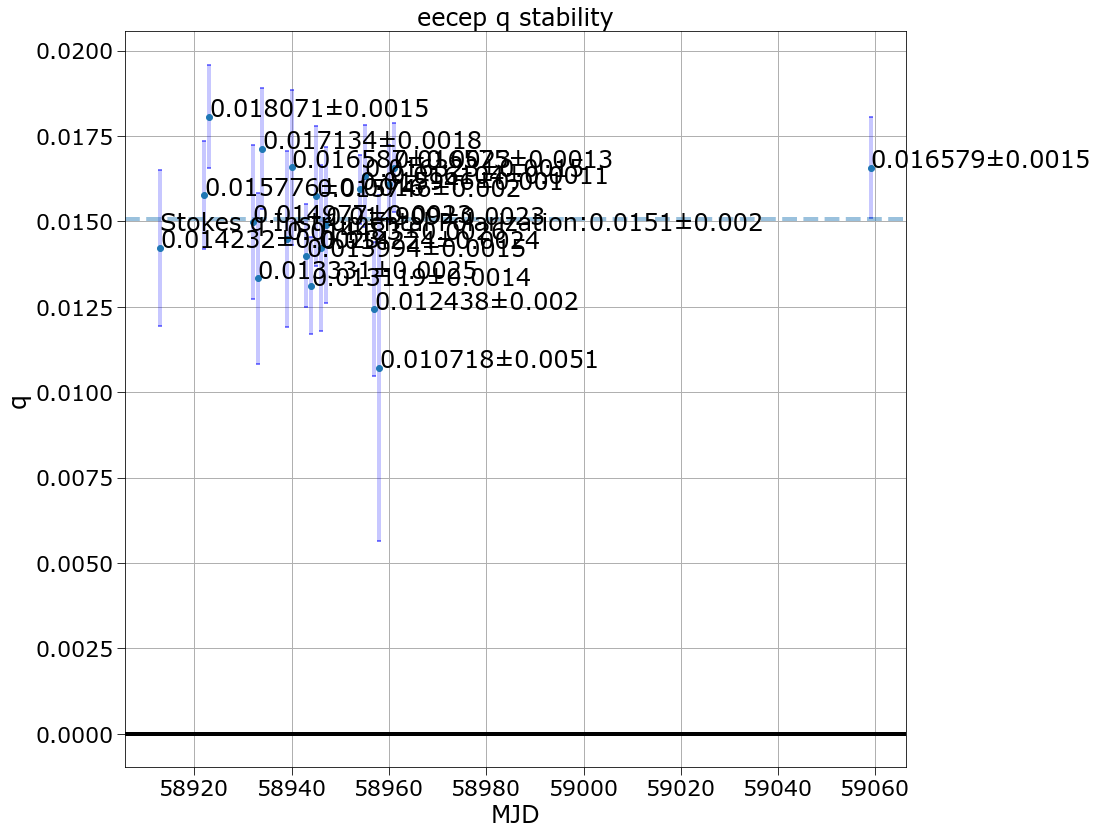

tck: (array([58913., 58913., 58913., 58913., 58923., 58932., 58933., 58934.,
       58939., 58940., 58943., 58944., 58945., 58946., 58947., 58954.,
       58955., 58957., 58958., 58960., 59059., 59059., 59059., 59059.]), array([ 1.42315158e-02, -4.05232407e-03,  2.47409330e-02,  2.39453809e-02,
        1.17609619e-02,  2.59882931e-02,  9.78345821e-03,  1.91003540e-02,
        1.54179653e-02,  1.18446622e-02,  1.73484165e-02,  1.32367363e-02,
        1.86727705e-02,  1.40691847e-02,  1.70288075e-02,  1.32947660e-02,
        8.91520572e-03,  2.03274856e-01, -5.56892415e+00,  1.65792075e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), 3)
tck[0]: [58913. 58913. 58913. 58913. 58923. 58932. 58933. 58934. 58939. 58940.
 58943. 58944. 58945. 58946. 58947. 58954. 58955. 58957. 58958. 58960.
 59059. 59059. 59059. 59059.]
tck[1]: [ 1.42315158e-02 -4.05232407e-03  2.47409330e-02  2.39453809e-02
  1.17609619e-02  2.59882931e-02  9.78345821e-03  1.91003540e-02
  1.54

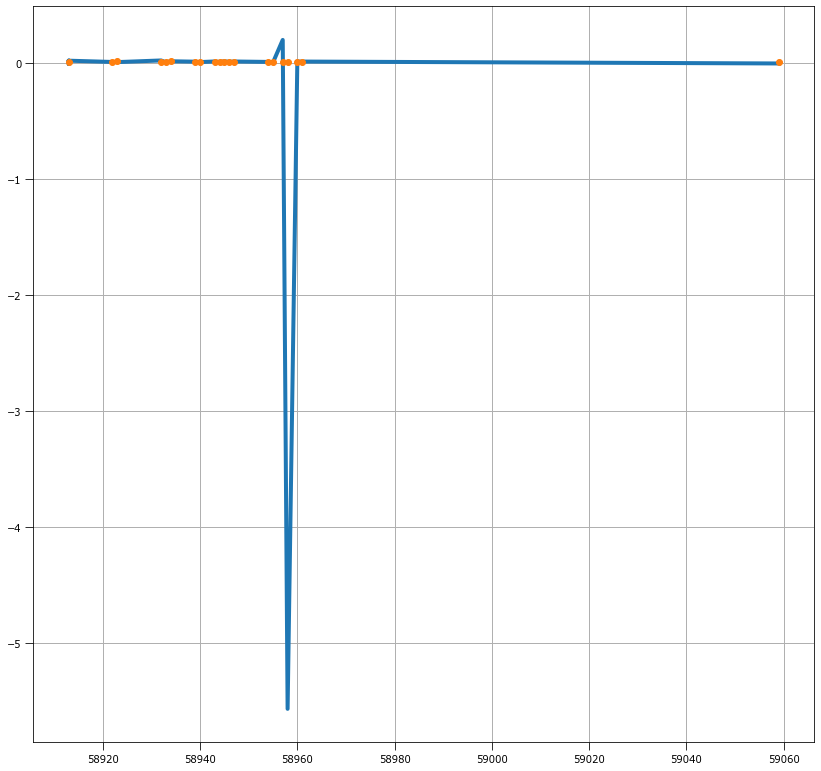

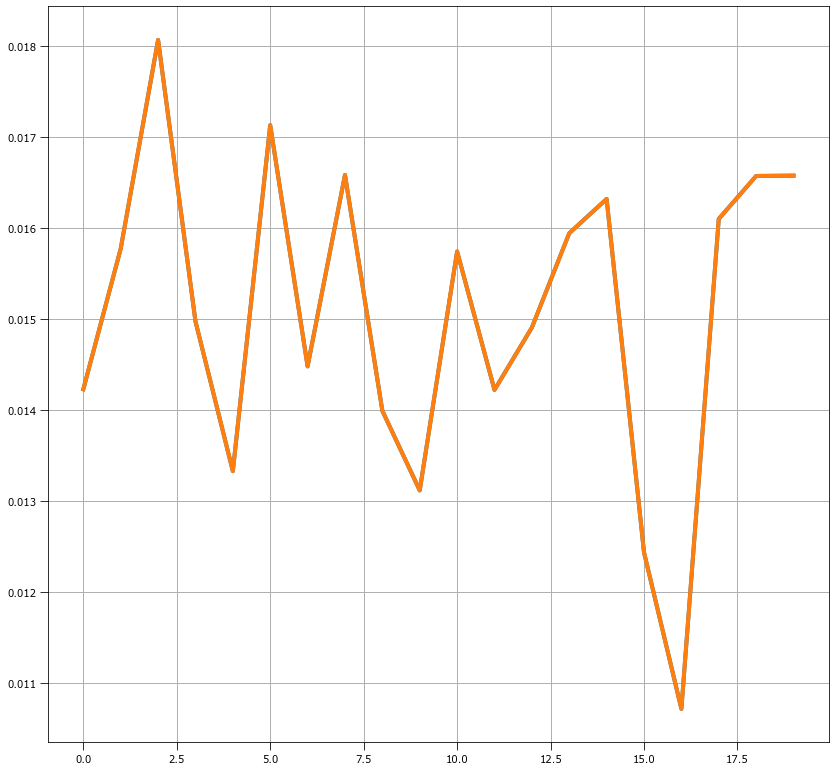

Plot q or u stability


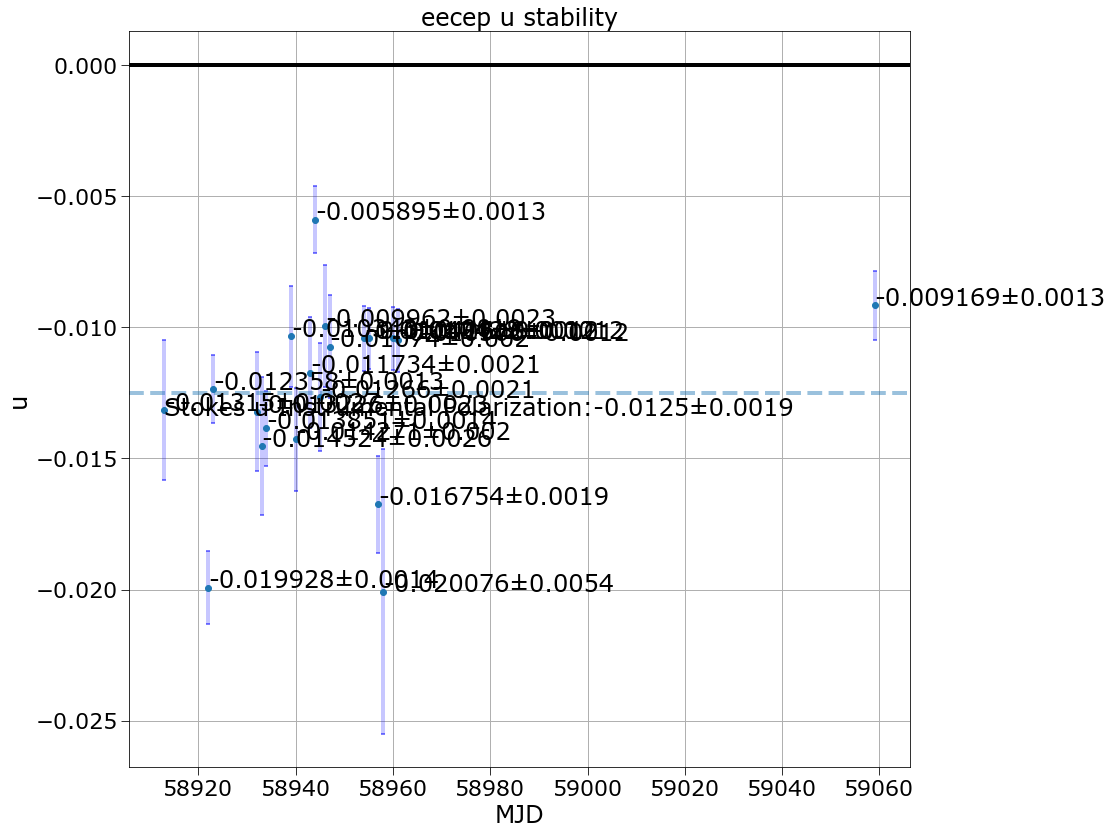

tck: (array([58913., 58913., 58913., 58913., 58923., 58932., 58933., 58934.,
       58939., 58940., 58943., 58944., 58945., 58946., 58947., 58954.,
       58955., 58957., 58958., 58960., 59059., 59059., 59059., 59059.]), array([-1.31501747e-02, -9.77251882e-02,  2.33098366e-02, -9.02899383e-03,
       -1.49480783e-02, -1.27740830e-02, -3.66316287e-03, -1.76237663e-02,
       -2.03658331e-02, -1.48817281e-03, -1.66038183e-02, -8.05792803e-03,
       -1.66918171e-02, -1.11891236e-02, -9.81508691e-03, -1.48231725e-02,
       -2.36297634e-02,  3.45257096e-01, -1.17226496e+01, -9.16944818e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00]), 3)
tck[0]: [58913. 58913. 58913. 58913. 58923. 58932. 58933. 58934. 58939. 58940.
 58943. 58944. 58945. 58946. 58947. 58954. 58955. 58957. 58958. 58960.
 59059. 59059. 59059. 59059.]
tck[1]: [-1.31501747e-02 -9.77251882e-02  2.33098366e-02 -9.02899383e-03
 -1.49480783e-02 -1.27740830e-02 -3.66316287e-03 -1.76237663e-02
 -2.03

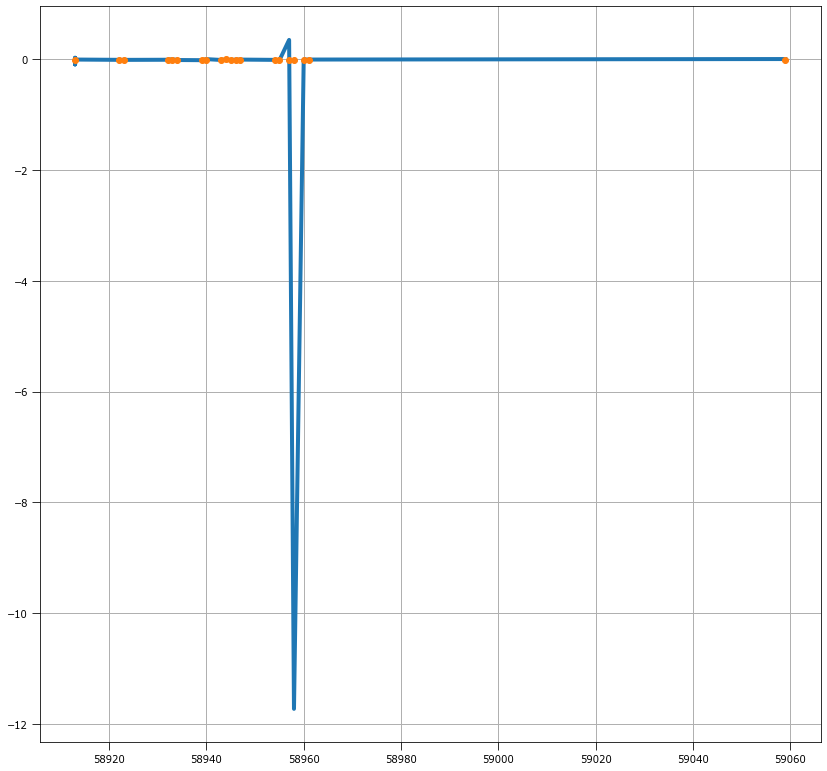

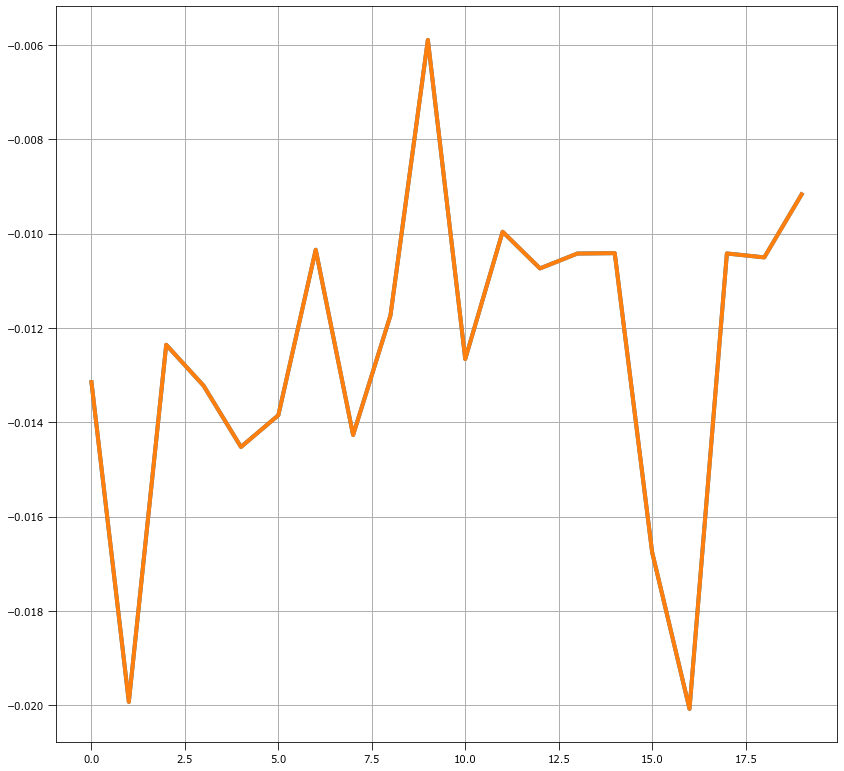

[-0.01252043205418868, 0.001934784219207976]

In [40]:
funcs_polarimetry.q_n_u_single_plot_v1(filtered_data, 'pink', './img_out/'+['EE Cep'][0], False , True, True,True, './img_out/stability/target_q_n_u')
funcs_polarimetry.plot_q_u_stability(filtered_data, 'q', True,False, False, './img_out/stability/EE Cephei_q_stab')
funcs_polarimetry.plot_q_u_stability(filtered_data, 'u', True,False, False,'./img_out/stability/EE Cephei_u_stab')

Returned 4 results
N obs: 4


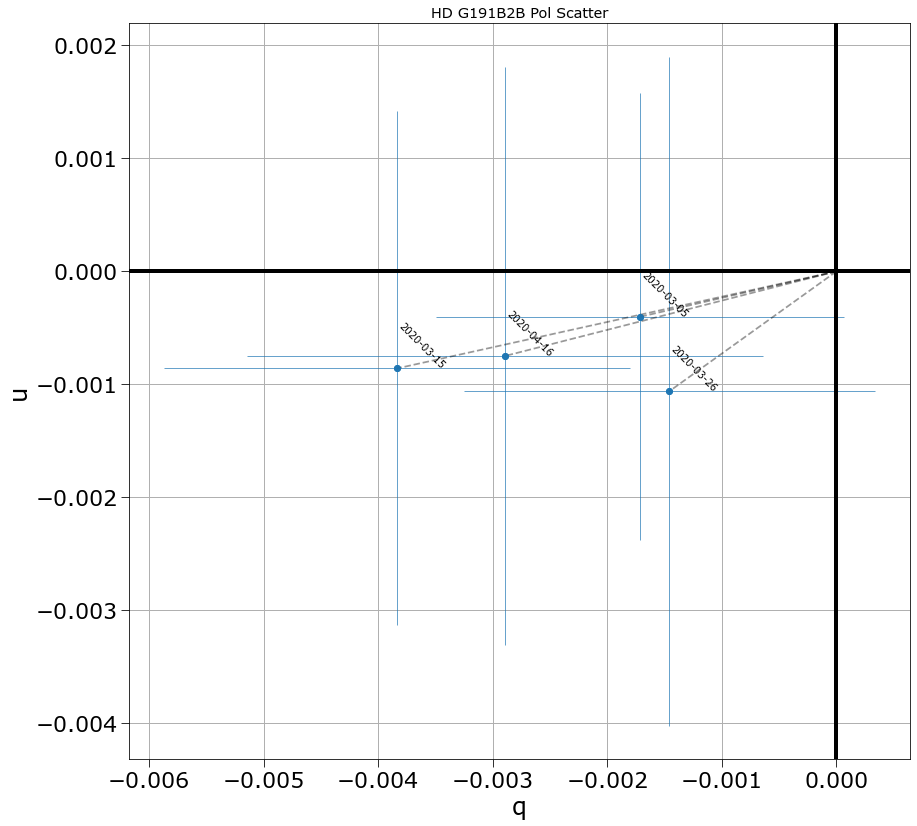

Plot q or u stability
2020-03-05_g191b2b 2020-03-05T00:00:00.000 58913.0
2020-03-15_G191B2B 2020-03-15T00:00:00.000 58923.0
2020-03-26_g191b2b 2020-03-26T00:00:00.000 58934.0
2020-04-16_g191b2b 2020-04-16T00:00:00.000 58955.0


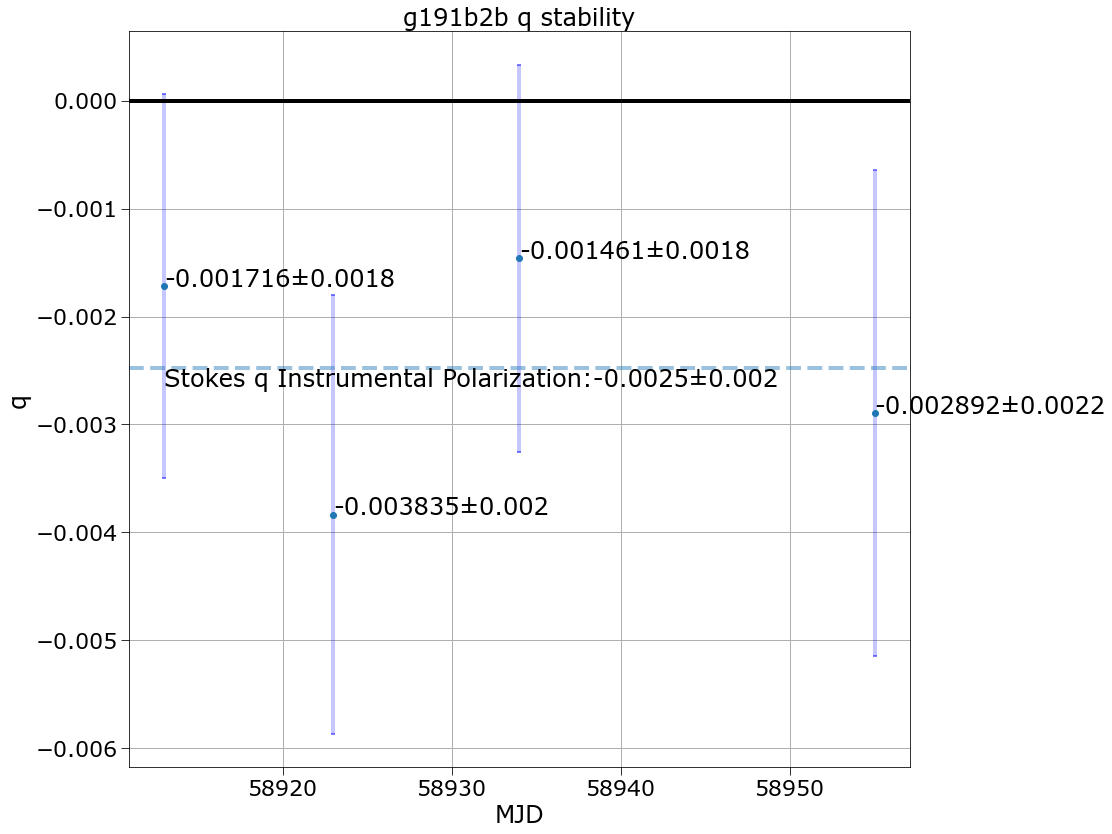

tck: (array([58913., 58913., 58913., 58913., 58955., 58955., 58955., 58955.]), array([-0.00171592, -0.00958235,  0.00722367, -0.00289243,  0.        ,
        0.        ,  0.        ,  0.        ]), 3)
tck[0]: [58913. 58913. 58913. 58913. 58955. 58955. 58955. 58955.]
tck[1]: [-0.00171592 -0.00958235  0.00722367 -0.00289243  0.          0.
  0.          0.        ]


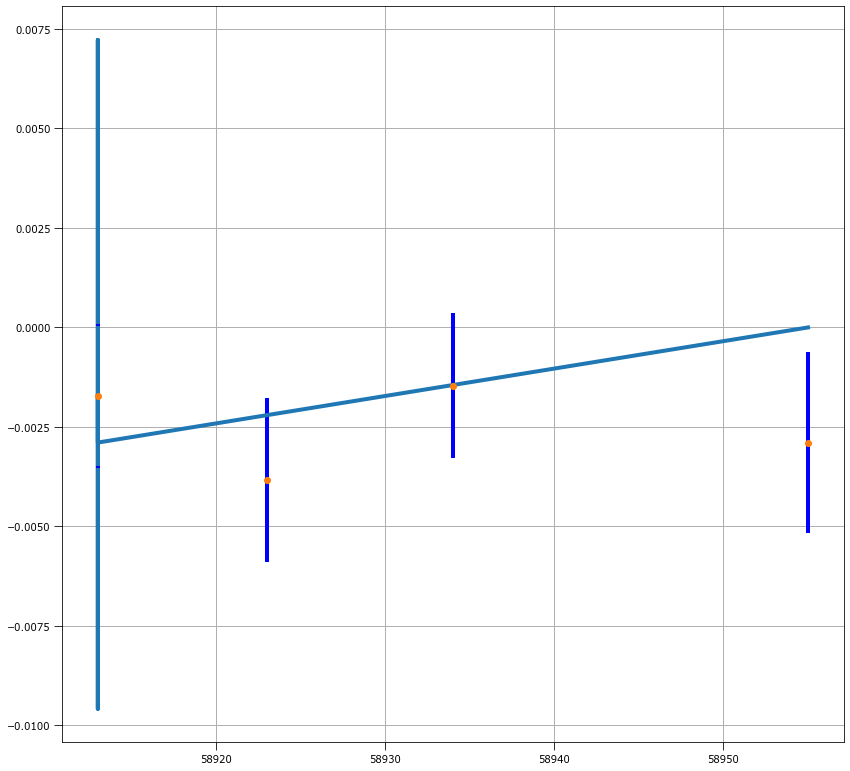

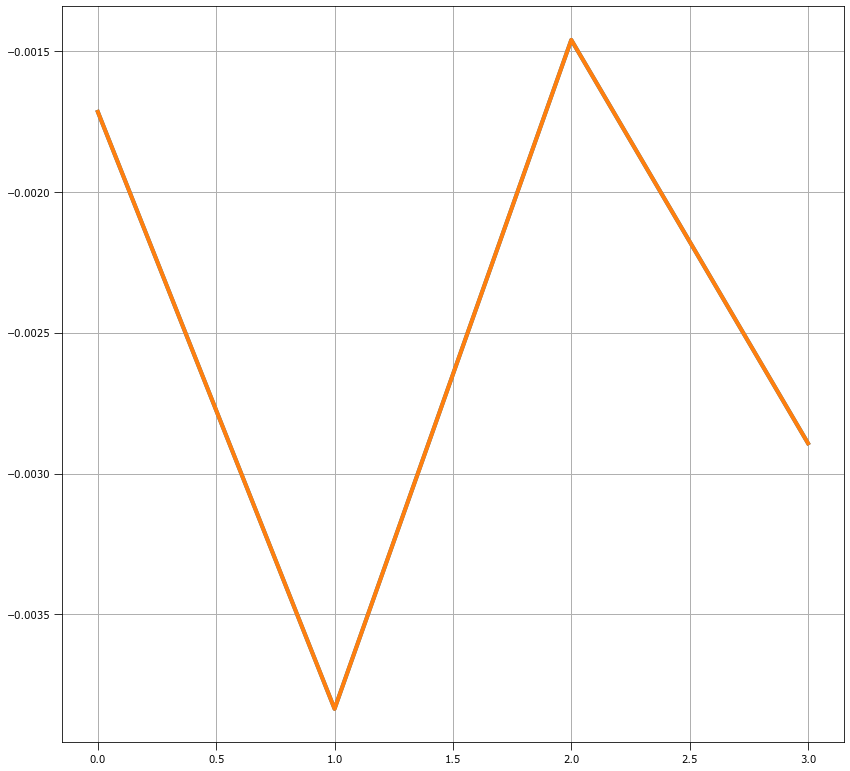

Plot q or u stability
2020-03-05_g191b2b 2020-03-05T00:00:00.000 58913.0
2020-03-15_G191B2B 2020-03-15T00:00:00.000 58923.0
2020-03-26_g191b2b 2020-03-26T00:00:00.000 58934.0
2020-04-16_g191b2b 2020-04-16T00:00:00.000 58955.0


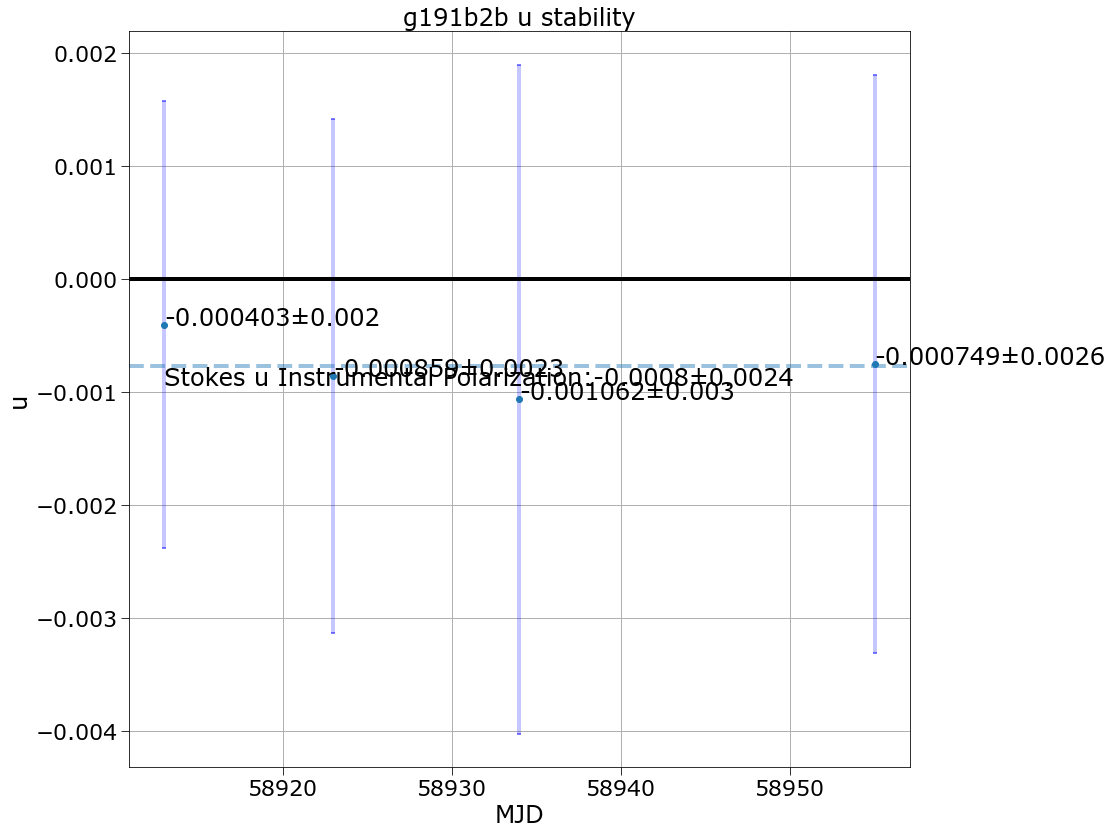

tck: (array([58913., 58913., 58913., 58913., 58955., 58955., 58955., 58955.]), array([-0.00040291, -0.00123944, -0.00120924, -0.00074873,  0.        ,
        0.        ,  0.        ,  0.        ]), 3)
tck[0]: [58913. 58913. 58913. 58913. 58955. 58955. 58955. 58955.]
tck[1]: [-0.00040291 -0.00123944 -0.00120924 -0.00074873  0.          0.
  0.          0.        ]


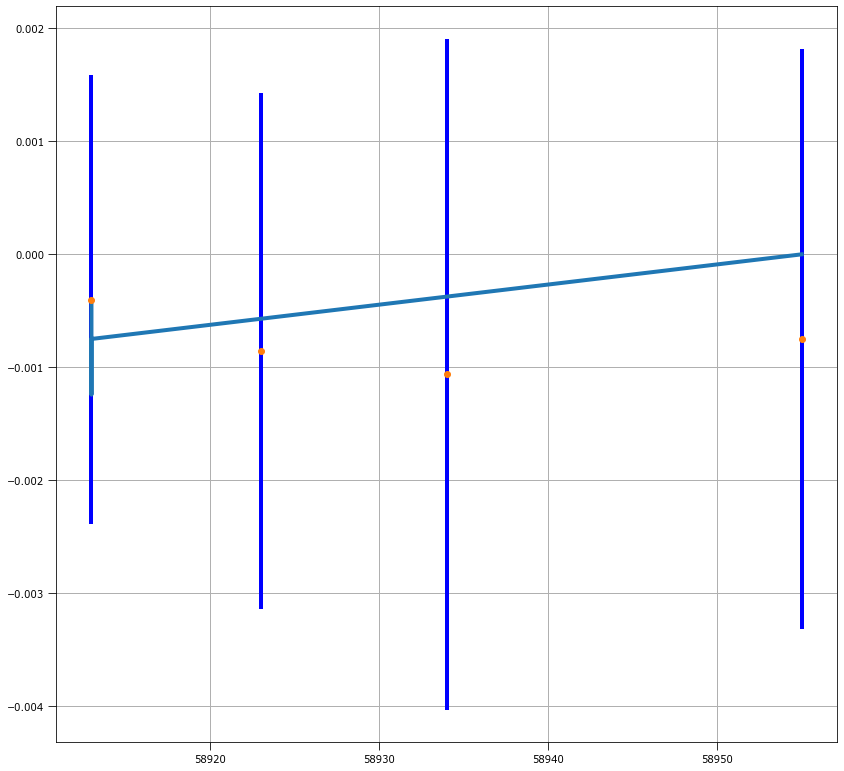

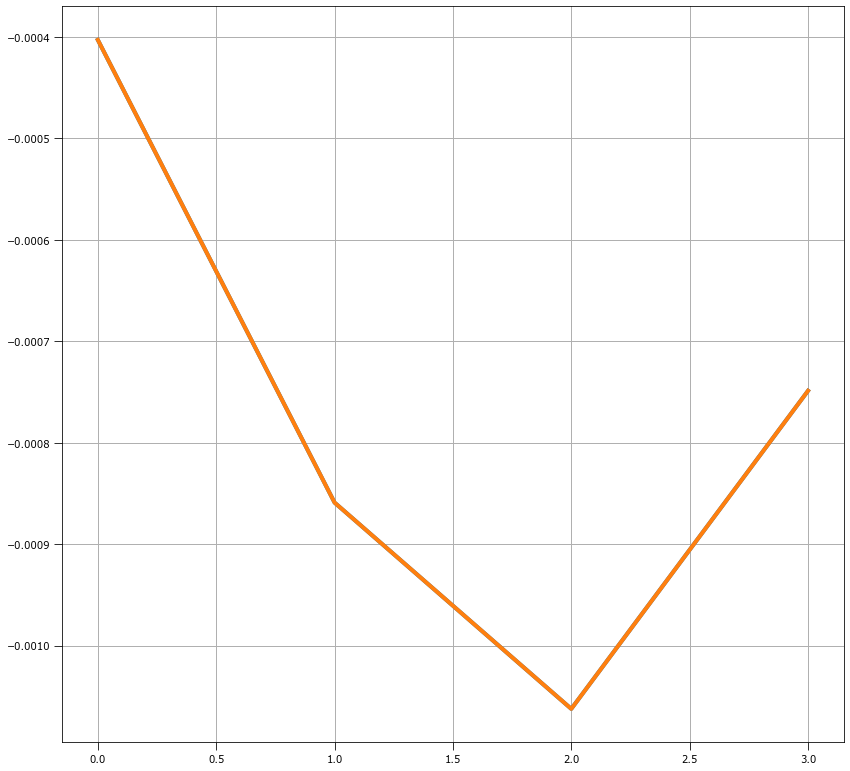

In [10]:
#I tried to do a bunch of stuff but its not fully materialised yet.

data_strs = ['g191b2b', 'G191B2B']
filtered_data = funcs_utils.filter_data(zero_pol_data, data_strs)
funcs_polarimetry.q_n_u_single_plot_v1(filtered_data, 'pink', './img_out/HD '+['G191B2B'][0], False , True, True,True, './img_out/stability/zero_pol_q_u_b')
q_stab = funcs_polarimetry.plot_q_u_stability(filtered_data, 'q', True,True, False,'./img_out/stability/G191B2B_q_stab')
u_stab = funcs_polarimetry.plot_q_u_stability(filtered_data, 'u', True,True, False,'./img_out/stability/G191B2B_u_stab')

In [24]:
print("q_mean:", q_stab)
print("u_mean:", u_stab)

data_strs = ['215806']
filtered_data = funcs_utils.filter_data(high_pol_data, data_strs)

funcs_polarimetry.calib_data(filtered_data, (q_stab[0], q_stab[1] ,u_stab[0], u_stab[1]), False, True) #just work on the artefact
                                                                                                 #Filtered Data

q_mean: [-0.0024760233141428016, 0.0019636318897151527]
u_mean: [-0.0007681921846587989, 0.0024426308224317346]
Returned 13 results
Function that takes in a dataset and a calibration points and subtracts the data
I am here!
Data (pre cal): [{'2020-03-05_hd215806': (['q', 0.0035766336376473213, 0.002875600839293862, 0.0021830948386741965, 0.0013663142385187056, 0.0014358935131312095, 0.002629654995003258, 0.0007589537197385242, 0.0017828780998693226, 0.0016717803337974225, 0.002706781179235799, 0.0009885667604936775, 0.0024398364749080377, -0.0006863075418923579, 0.00144834335828682, -0.0012700983222801456, -0.0008081206096435489, 0.002705948444336914, 0.004706008345604556, 0.001116027044423932, 0.0025684156778051225, 0.0009990356748282038, 0.0020783484456782953, -0.003121031461911071, 0.0025493658057281314, 5.5239928824657924e-05, 0.0017564158606647687, 0.0018933784986435223, 0.003783924436451951, 0.003707775204451388, -0.00040944634128913074], ['q error', 0.011226081653278548, 0.01071

0.004132754073022591
0.004119847258397473
0.001737933958777206
0.004383381727235132
0.003454233963458364
0.005054577790753104
0.006629287986949162


In [3]:
#for zi in range(0, len(zero_pol_data)):
#    q_m, u_m = funcs_polarimetry.mean_q_u_check(filtered_data, zi, "RINGO", True) #Its very small. I'm digging it
#    print(q_m, u_m, "\n")
#plt.scatter(target_qs, target_us, color = 'red', alpha=0.11)
#plt.errorbar(target_qs, target_us, xerr=targ_qstds, yerr=targ_ustds, lw=0.75, fmt="o", color="r", alpha=0.1)
#compare q added in quadrature

#and np.std(q)

#Then you would have learned something and solved todays problem

#Lets calculate Instrumental Polarization

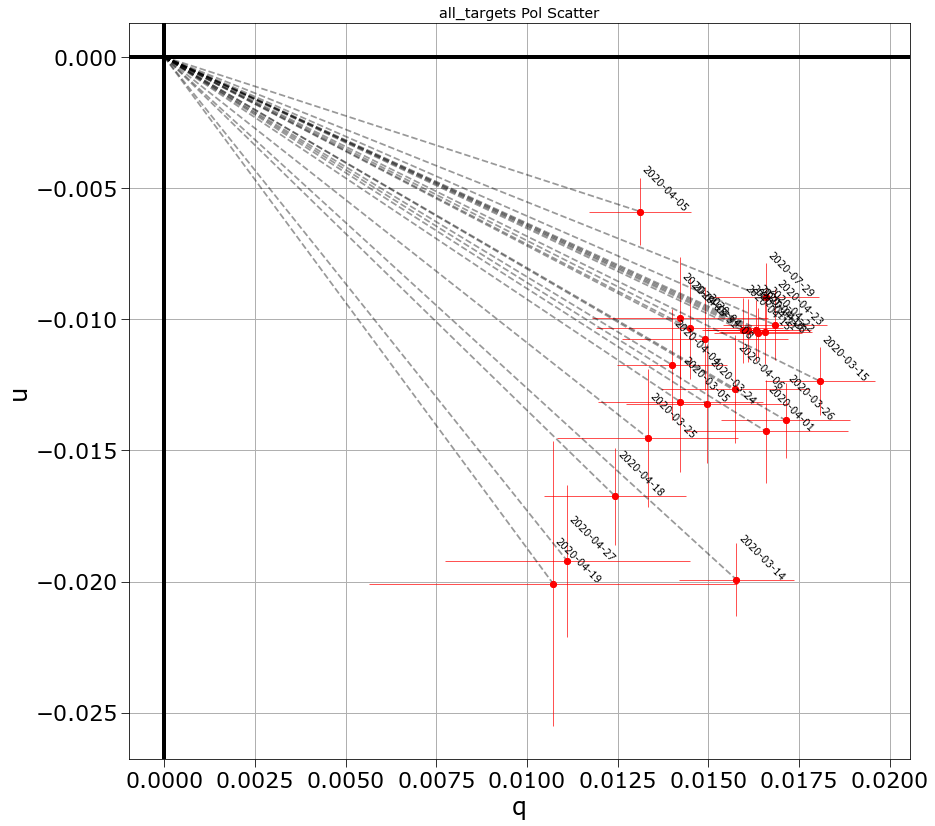

In [20]:
funcs_polarimetry.q_n_u_single_plot_v1(target_data, 'red', './img_out/all_targets', '', False, True ,True, False)

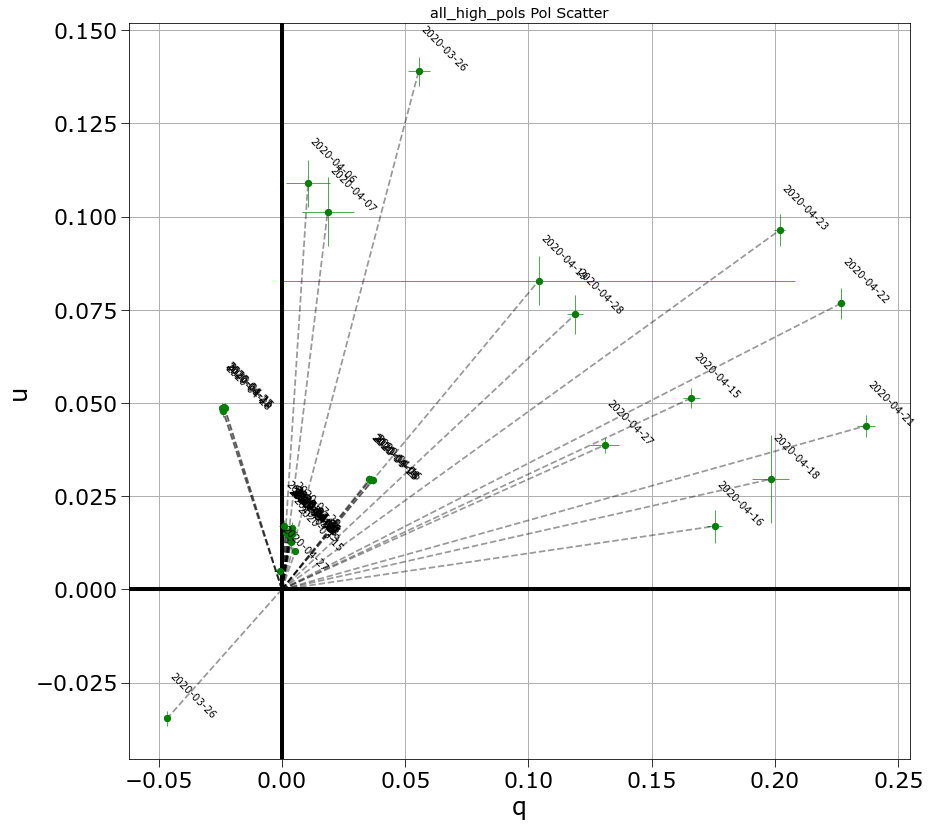

In [21]:
funcs_polarimetry.q_n_u_single_plot_v1(high_pol_data, 'green', './img_out/all_high_pols', 'high_pol', False, True ,True, False) #

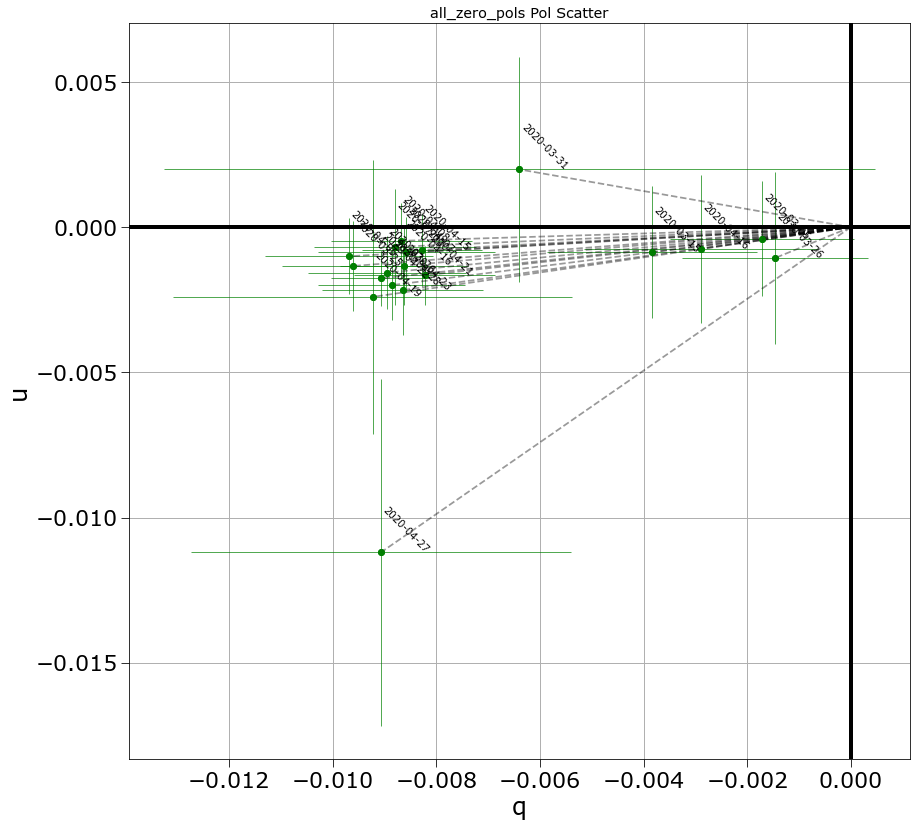

In [22]:
funcs_polarimetry.q_n_u_single_plot_v1(zero_pol_data[:], 'green','./img_out/all_zero_pols', 'zero_pol', False, True ,True, False) #

Length of pol data: 37
2020-03-05_hd215806
2020-03-14_HD215806
2020-03-15_HD215806
2020-03-26_oj287
2020-03-26_hd204827
2020-03-26_HD215806
2020-03-26_hd251204
2020-04-06_hd215806
2020-04-06_oj287
2020-04-07_hd215806
2020-04-07_oj287
2020-04-08_hd204827
2020-04-08_hd215806
2020-04-15_hd204827
2020-04-15_hd215806
2020-04-15_oj287
2020-04-16_hd204827
2020-04-16_bd64106
2020-04-16_hd215806
2020-04-16_oj287
2020-04-18_OJ287
2020-04-19_hd215806
2020-04-19_oj287
2020-04-21_hd215806
2020-04-21_oj287
2020-04-22_hd215806
2020-04-22_bd64106
2020-04-22_oj287
2020-04-23_bd64106
2020-04-23_hd215806
2020-04-23_oj287
2020-04-27_HD215806
2020-04-27_OJ287
2020-04-28_bd64106
2020-04-28_hd215806
2020-04-28_oj287
2020-07-29_hd215806
Length of pol data: 19
2020-03-05_g191b2b
2020-03-15_G191B2B
2020-03-25_hd212311
2020-03-26_g191b2b
2020-03-26_hd212311
2020-03-31_hd212311
2020-04-06_hd212311
2020-04-07_hd212311
2020-04-08_hd212311
2020-04-15_hd212311
2020-04-16_g191b2b
2020-04-16_hd212311
2020-04-19_HD21231

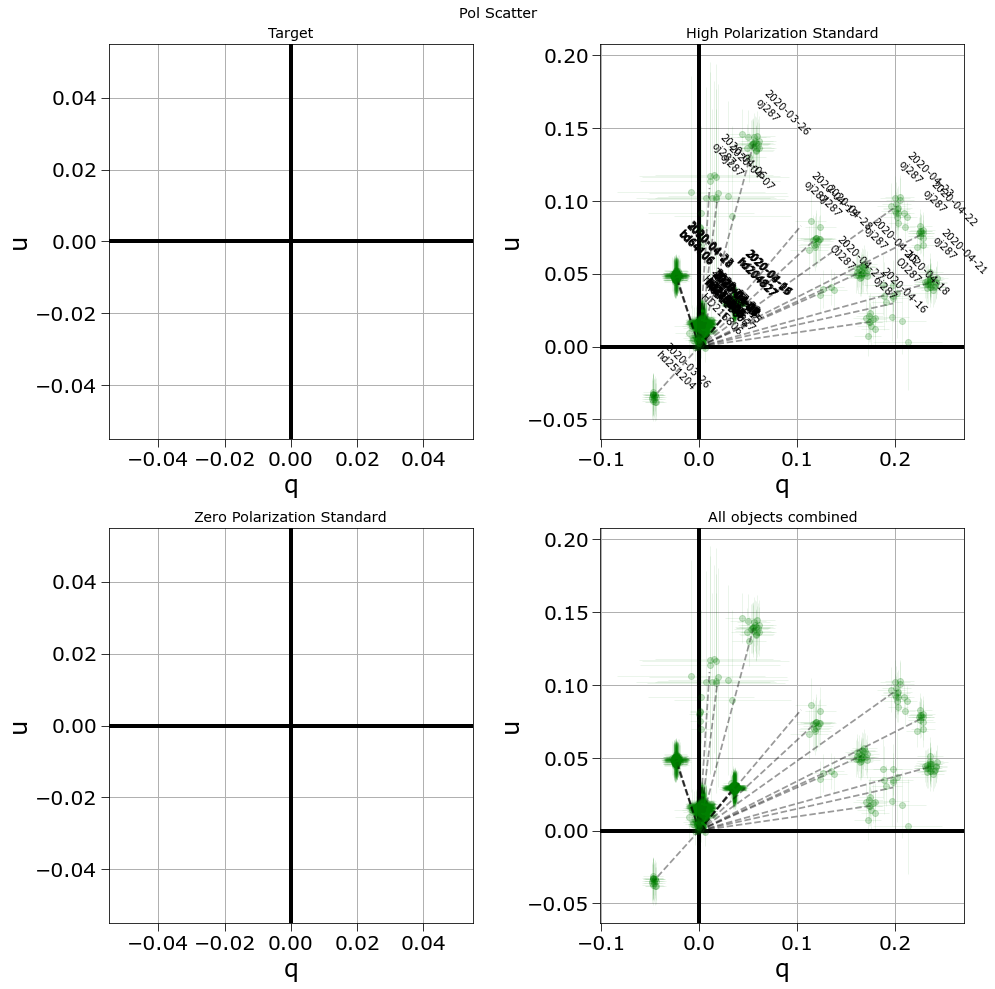

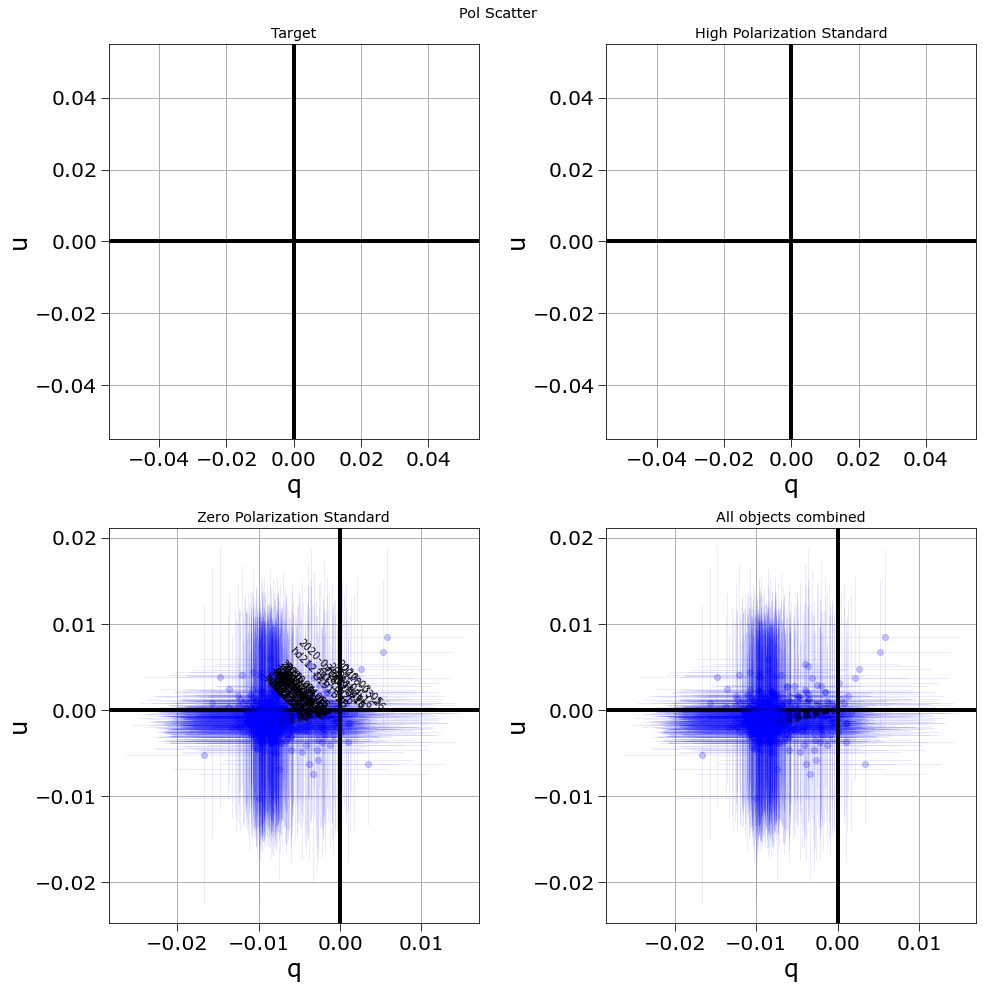

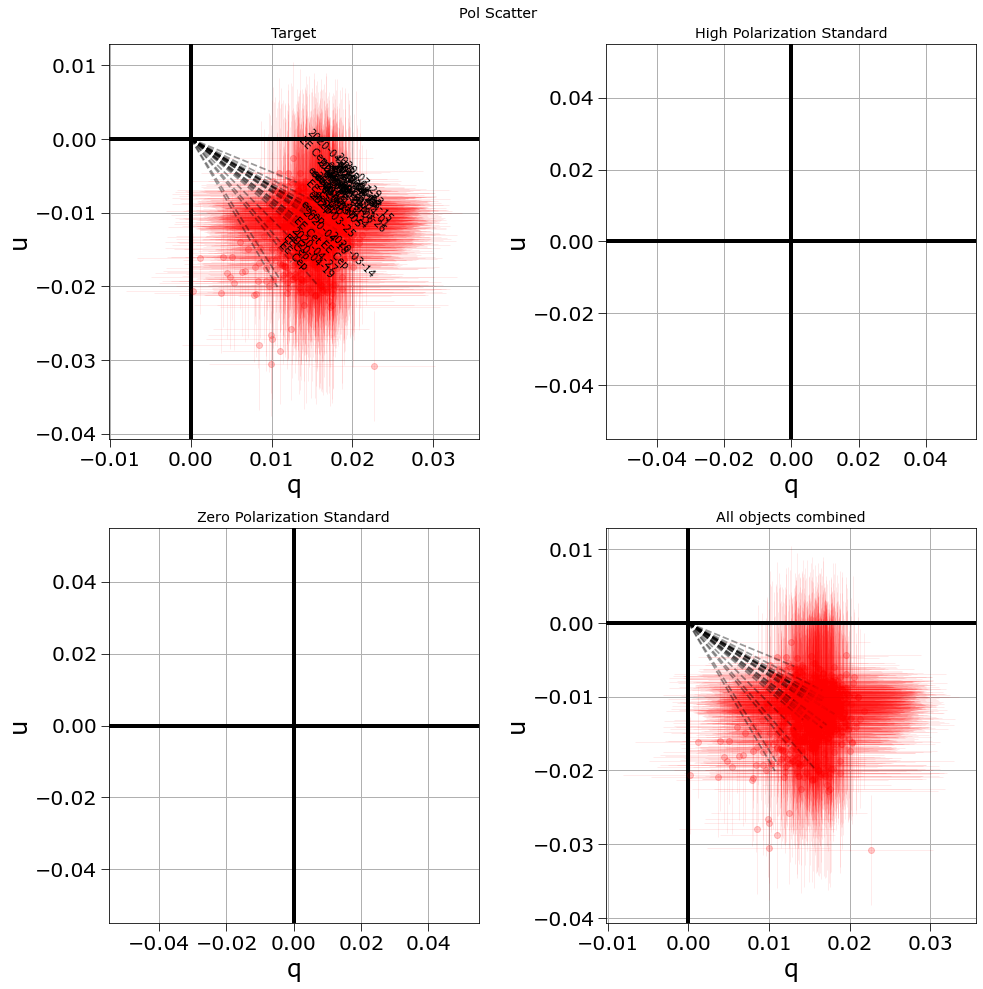

In [9]:
#use them as the same input
#Let me just see HD212311
#There is an outlier in there. Remove it please
funcs_polarimetry.q_n_u_stack_plot_v2(high_pol_data, 'high_pol', True, True, True) 
funcs_polarimetry.q_n_u_stack_plot_v2(zero_pol_data, 'zero_pol',True, True, True) 
funcs_polarimetry.q_n_u_stack_plot_v2(target_data, 'target_pol',True, True, True) 

Length of pol data: 66
2020-03-05_eecep
2020-03-14_EE Cep
2020-03-15_EE Cep
2020-03-24_eecep
2020-03-25_eecep
2020-03-26_eecep
2020-03-31_eecep
2020-04-01_EE_Cep
2020-04-04_EE Cep
2020-04-05_EE Cep
2020-04-06_eecep
2020-04-07_eecep
2020-04-08_eecep
2020-04-15_eecep
2020-04-16_eecep
2020-04-18_EE Cet
2020-04-19_EE Cep
2020-04-21_eecep
2020-04-22_eecep
2020-07-29_eecep
2020-03-05_g191b2b
2020-03-15_G191B2B
2020-03-25_hd212311
2020-03-26_g191b2b
2020-03-26_hd212311
2020-03-31_hd212311
2020-04-06_hd212311
2020-04-07_hd212311
2020-04-08_hd212311
2020-04-15_hd212311
2020-04-16_g191b2b
2020-04-16_hd212311
2020-04-19_HD212311
2020-04-21_hd212311
2020-04-22_hd212311
2020-07-29_hd212311
2020-03-05_hd215806
2020-03-14_HD215806
2020-03-15_HD215806
2020-03-26_oj287
2020-03-26_hd204827
2020-03-26_HD215806
2020-03-26_hd251204
2020-04-06_hd215806
2020-04-06_oj287
2020-04-07_hd215806
2020-04-07_oj287
2020-04-08_hd204827
2020-04-08_hd215806
2020-04-15_hd204827
2020-04-15_hd215806
2020-04-15_oj287
2020-0

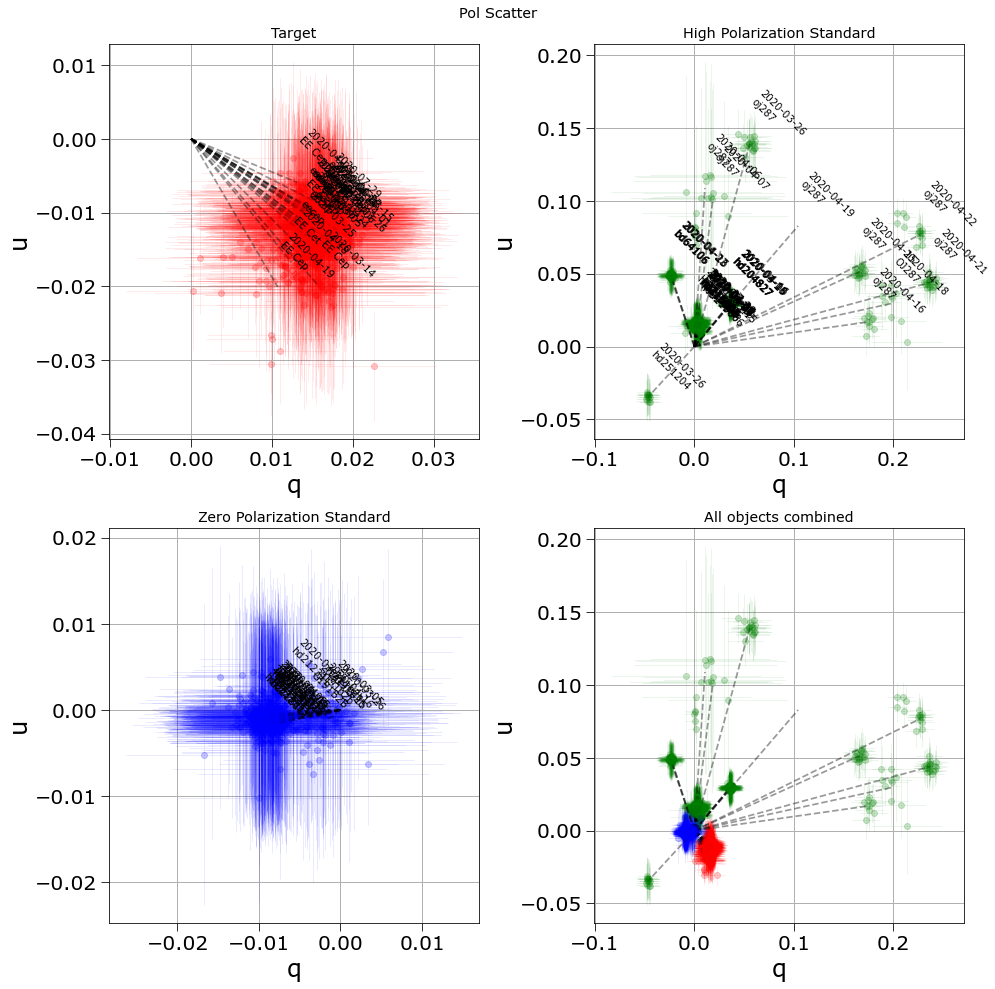

In [9]:
funcs_polarimetry.q_n_u_stack_plot_v2(master_list ,'master_plot', True, True ,True ) 